# NIFTY100 FORECASTING - ARMA & ARIMA

In [1]:
!pip install scikit-learn statsmodels pandas matplotlib yfinance seaborn pandas-ta --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
!pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 28.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is i

In [1]:
# Setup

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pandas_ta as ta
import numpy as np
import statsmodels
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
%matplotlib inline
plt.rcParams['figure.figsize'] =  (22,5)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Folder containing CSV files
import h5py
path = '/content/drive/MyDrive/Econ_project/archive-2/FullData.h5'
with h5py.File(path, 'r') as f:
    print("Available keys:", list(f.keys()))

Mounted at /content/drive
Available keys: ['AARTIIND__EQ__NSE__NSE__MINUTE', 'ABCAPITAL__EQ__NSE__NSE__MINUTE', 'ABFRL__EQ__NSE__NSE__MINUTE', 'ADANIENT__EQ__NSE__NSE__MINUTE', 'ADANIGAS__EQ__NSE__NSE__MINUTE', 'ADANIPORTS__EQ__NSE__NSE__MINUTE', 'AJANTPHARM__EQ__NSE__NSE__MINUTE', 'AMARAJABAT__EQ__NSE__NSE__MINUTE', 'APLLTD__EQ__NSE__NSE__MINUTE', 'APOLLOHOSP__EQ__NSE__NSE__MINUTE', 'APOLLOTYRE__EQ__NSE__NSE__MINUTE', 'ASHOKLEY__EQ__NSE__NSE__MINUTE', 'ASIANPAINT__EQ__NSE__NSE__MINUTE', 'AUBANK__EQ__NSE__NSE__MINUTE', 'AXISBANK__EQ__NSE__NSE__MINUTE', 'BAJAJFINSV__EQ__NSE__NSE__MINUTE', 'BAJAJ_AUTO__EQ__NSE__NSE__MINUTE', 'BAJFINANCE__EQ__NSE__NSE__MINUTE', 'BALKRISIND__EQ__NSE__NSE__MINUTE', 'BANKINDIA__EQ__NSE__NSE__MINUTE', 'BATAINDIA__EQ__NSE__NSE__MINUTE', 'BBTC__EQ__NSE__NSE__MINUTE', 'BEL__EQ__NSE__NSE__MINUTE', 'BHARATFORG__EQ__NSE__NSE__MINUTE', 'BHARTIARTL__EQ__NSE__NSE__MINUTE', 'BHEL__EQ__NSE__NSE__MINUTE', 'BPCL__EQ__NSE__NSE__MINUTE', 'BRITANNIA__EQ__NSE__NSE__MINUTE', '

In [3]:
info = pd.read_hdf(path, key='master')
info.head()

,tradingsymbol,name,instrument_type,segment,exchange,data_type,key,from,to
0,NIFTY 50,NIFTY 50,EQ,INDICES,NSE,minute,NIFTY_50__EQ__INDICES__NSE__MINUTE,2017-01-01 00:00:00+05:30,2021-01-01 23:59:59+05:30
1,NIFTY 100,NIFTY 100,EQ,INDICES,NSE,minute,NIFTY_100__EQ__INDICES__NSE__MINUTE,2017-01-01 00:00:00+05:30,2021-01-01 23:59:59+05:30
2,NIFTY 500,NIFTY 500,EQ,INDICES,NSE,minute,NIFTY_500__EQ__INDICES__NSE__MINUTE,2019-07-02 00:00:00+05:30,2021-01-01 23:59:59+05:30
3,NIFTY AUTO,NIFTY AUTO,EQ,INDICES,NSE,minute,NIFTY_AUTO__EQ__INDICES__NSE__MINUTE,2017-01-01 00:00:00+05:30,2021-01-01 23:59:59+05:30
4,NIFTY BANK,NIFTY BANK,EQ,INDICES,NSE,minute,NIFTY_BANK__EQ__INDICES__NSE__MINUTE,2017-01-01 00:00:00+05:30,2021-01-01 23:59:59+05:30


In [4]:
df = pd.read_hdf(path, key='NIFTY_100__EQ__INDICES__NSE__MINUTE')
df.dropna(inplace=True)
df.head()

,open,high,low,close,volume
timestamp,,,,,
2017-01-02 09:15:00+05:30,8409.60,8409.75,8390.75,8391.10,0.0
2017-01-02 09:16:00+05:30,8391.85,8395.35,8390.40,8391.15,0.0
2017-01-02 09:17:00+05:30,8391.15,8391.55,8373.60,8373.60,0.0
2017-01-02 09:18:00+05:30,8373.60,8376.75,8369.90,8376.75,0.0
2017-01-02 09:19:00+05:30,8376.95,8377.25,8372.60,8373.70,0.0


In [5]:
df = df.reset_index()
df.head()

,timestamp,open,high,low,close,volume
0,2017-01-02 09:15:00+05:30,8409.60,8409.75,8390.75,8391.10,0.0
1,2017-01-02 09:16:00+05:30,8391.85,8395.35,8390.40,8391.15,0.0
2,2017-01-02 09:17:00+05:30,8391.15,8391.55,8373.60,8373.60,0.0
3,2017-01-02 09:18:00+05:30,8373.60,8376.75,8369.90,8376.75,0.0
4,2017-01-02 09:19:00+05:30,8376.95,8377.25,8372.60,8373.70,0.0


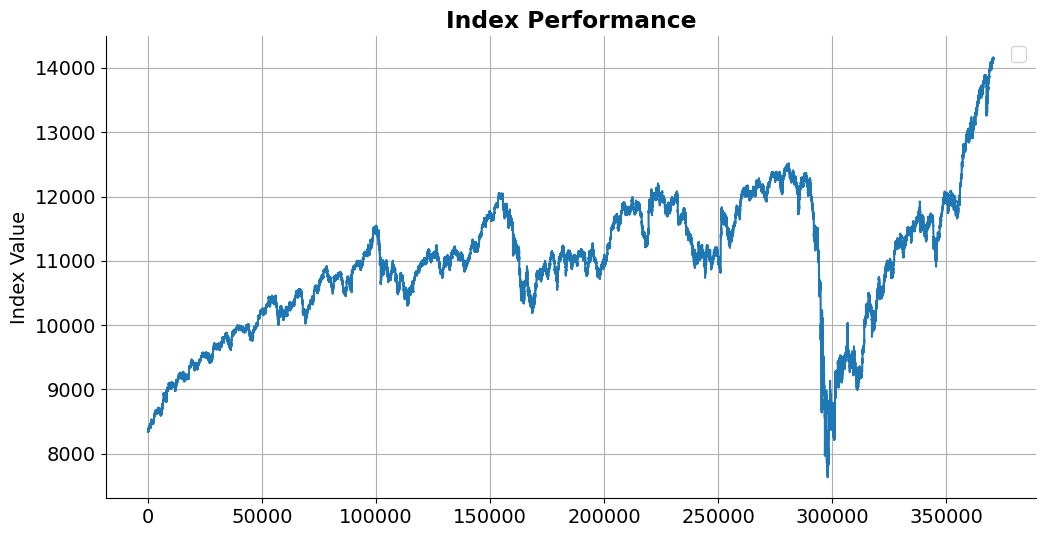

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df["close"])
plt.ylabel("Index Value")
plt.title("Index Performance", fontweight="bold")
plt.legend()
plt.grid()
plt.show()

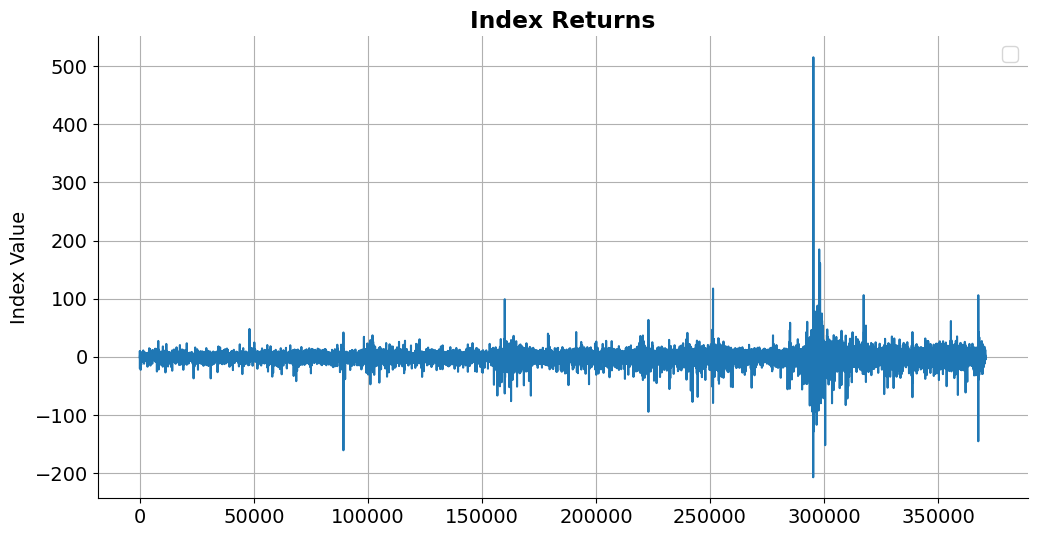

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df["close"] - df['open'])
plt.ylabel("Index Value")
plt.title("Index Returns", fontweight="bold")
plt.legend()
plt.grid()
plt.show()

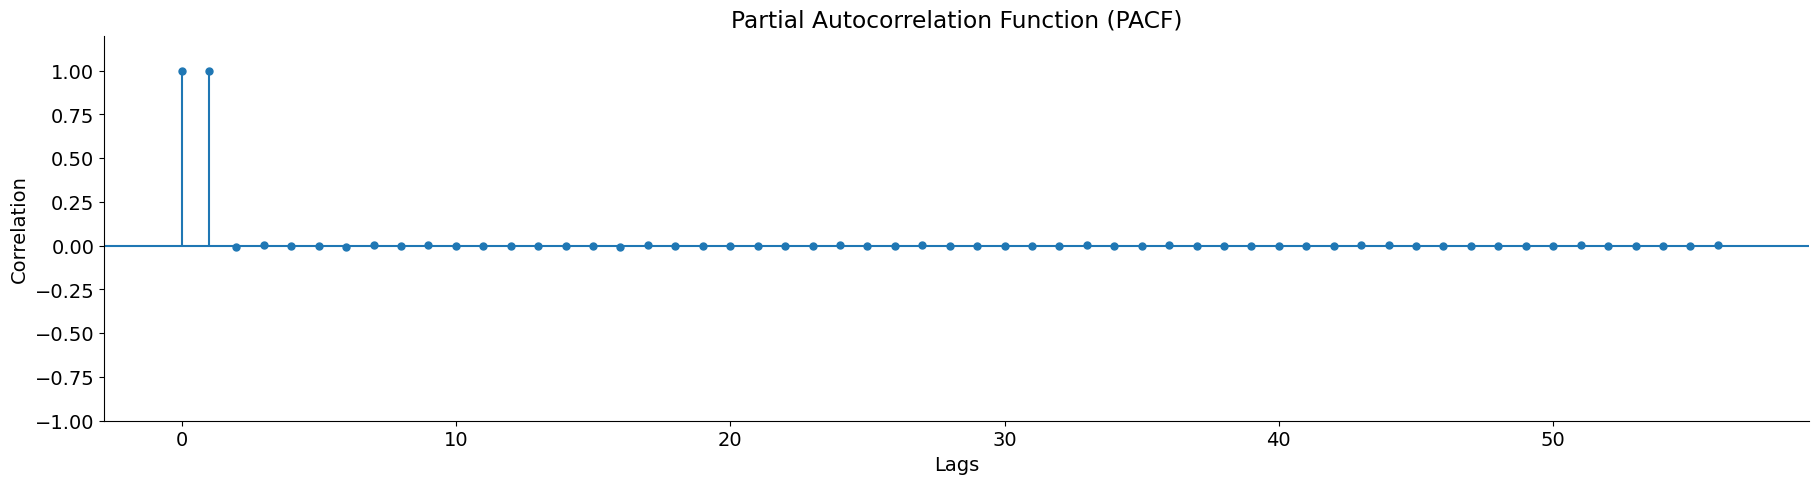

In [8]:
plot_pacf(df['close']) #pacf tells p (AR)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#Rotate the x-tick labels by 45 degrees
plt.xticks(rotation=0)
#Set the title, x-axis label, y-axis label, and legend
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.ylim(top=1.2)
plt.show()

In [9]:
pacf_values = pacf(df['close'])

# Print PACF values
print("PACF Values:", pacf_values)

PACF Values: [ 1.00000000e+00  9.99964973e-01 -5.27307033e-03  4.85776477e-03
  4.97649820e-04 -2.14082853e-03 -8.12584693e-03  4.76589778e-03
  3.52863885e-04  3.12613245e-03  5.10094224e-05  8.02668858e-04
 -4.80977378e-04 -1.00281422e-04 -1.26976465e-04 -1.89870180e-04
 -6.77431071e-03  4.33677510e-03 -1.84298802e-03 -1.24563323e-03
  5.07692452e-04 -2.84534327e-03  8.97060867e-04 -9.95832424e-04
  1.70039844e-03 -1.81157259e-03 -1.73180378e-03  3.37627329e-03
 -2.48202533e-03 -1.95115948e-04 -1.09955987e-05 -4.60588420e-03
 -1.13691810e-03  2.25294498e-03 -9.71439607e-04 -2.10725342e-04
  3.45265633e-03  2.95027173e-04 -1.47514403e-03  8.23894588e-04
 -2.92814943e-03 -9.92364059e-04 -7.39350875e-04  1.55570732e-03
  1.58632611e-03 -2.01553671e-03 -1.90358861e-03  5.07248551e-04
  1.12020937e-04 -2.82510892e-04  1.06821297e-03  2.66644082e-03
  1.10193681e-03 -1.38268791e-03 -1.08653912e-03 -6.72901363e-04]


In [10]:
# shifting the data by 1 and 2 rows
df['close_lag_1'], df['close_lag_2'] = df['close'].shift(1), df['close'].shift(2)
df.dropna(inplace=True)

# create a new df with the original series, 1 lagged and 2 lagged values
index_lagged = df[['close','close_lag_1', 'close_lag_2']]

# input dataframe
X = index_lagged[['close_lag_1', 'close_lag_2']]
X['intercept'] = 1

# output series
y = index_lagged['close']

In [11]:
# inputs to the model
X.head()

,close_lag_1,close_lag_2,intercept
2,8391.15,8391.10,1
3,8373.60,8391.15,1
4,8376.75,8373.60,1
5,8373.70,8376.75,1
6,8365.60,8373.70,1


In [12]:
# outputs expected
y.head()

,close
2,8373.60
3,8376.75
4,8373.70
5,8365.60
6,8371.20


In [13]:
LHS = np.dot(X.T, X)
RHS = np.dot(X.T, y)

# coefficient for lags (first 2, third is constant term) calculated using ordinary least squares implemented in Numpy
coeffs = np.linalg.solve(LHS, RHS) # AR(2)

# assigning the values
lag1_coeff, lag2_coeff, c = coeffs
print('Lag 1 Coeff :', round(lag1_coeff,4))
print('Lag 1 Coeff :', round(lag2_coeff,4))
print('Constant Value :', round(c,4))

Lag 1 Coeff : 1.0109
Lag 1 Coeff : -0.0109
Constant Value : 0.1552


In [14]:
#Helper Function to predict the values using just the AR Model
def predict_ar2(X_t_minus_1, X_t_minus_2, c, phi_1, phi_2):

    #Whatever we are returning is the equation for an AR(2) model
    return c + phi_1 * X_t_minus_1 + phi_2 * X_t_minus_2

In [16]:
#Adding a new column for the AR predictions
df['AR_Preds'] = predict_ar2(df['close_lag_1'], df['close_lag_2'], c, lag1_coeff, lag2_coeff)

#Probability or say confidence of the Prediction made by the AR model
min_val = df['AR_Preds'].min()
max_val = df['AR_Preds'].max()
df['Pred_Prob'] = round(((df['AR_Preds'] - min_val) / (max_val - min_val)) * 100, 2)

#df['Pred_Prob'] =  round(1/(1 + np.exp(-df['AR_Preds']))*100,2)

In [17]:
df[['timestamp','close', 'AR_Preds', 'Pred_Prob']]

,timestamp,close,AR_Preds,Pred_Prob
2,2017-01-02 09:17:00+05:30,8373.60,8391.198686,11.58
3,2017-01-02 09:18:00+05:30,8376.75,8373.456488,11.31
4,2017-01-02 09:19:00+05:30,8373.70,8376.832762,11.36
5,2017-01-02 09:20:00+05:30,8365.60,8373.715016,11.31
6,2017-01-02 09:21:00+05:30,8371.20,8365.559907,11.19
...,...,...,...,...
370672,2021-01-01 15:25:00+05:30,14137.70,14141.176720,99.64
370673,2021-01-01 15:26:00+05:30,14137.10,14137.637113,99.59
370674,2021-01-01 15:27:00+05:30,14136.80,14137.068280,99.58
370675,2021-01-01 15:28:00+05:30,14133.70,14136.771564,99.57


In [18]:
conf = round(df['Pred_Prob'].mean(),2)
residuals = df['close'] - df['AR_Preds']
ssr = round(np.sum(residuals**2),2)
print(f"The model is {conf}% confident in the predictions made by the AR Model")
print(f"Sum of Squares of Residuals (SSR): {ssr}")

The model is 50.98% confident in the predictions made by the AR Model
Sum of Squares of Residuals (SSR): 13419207.86


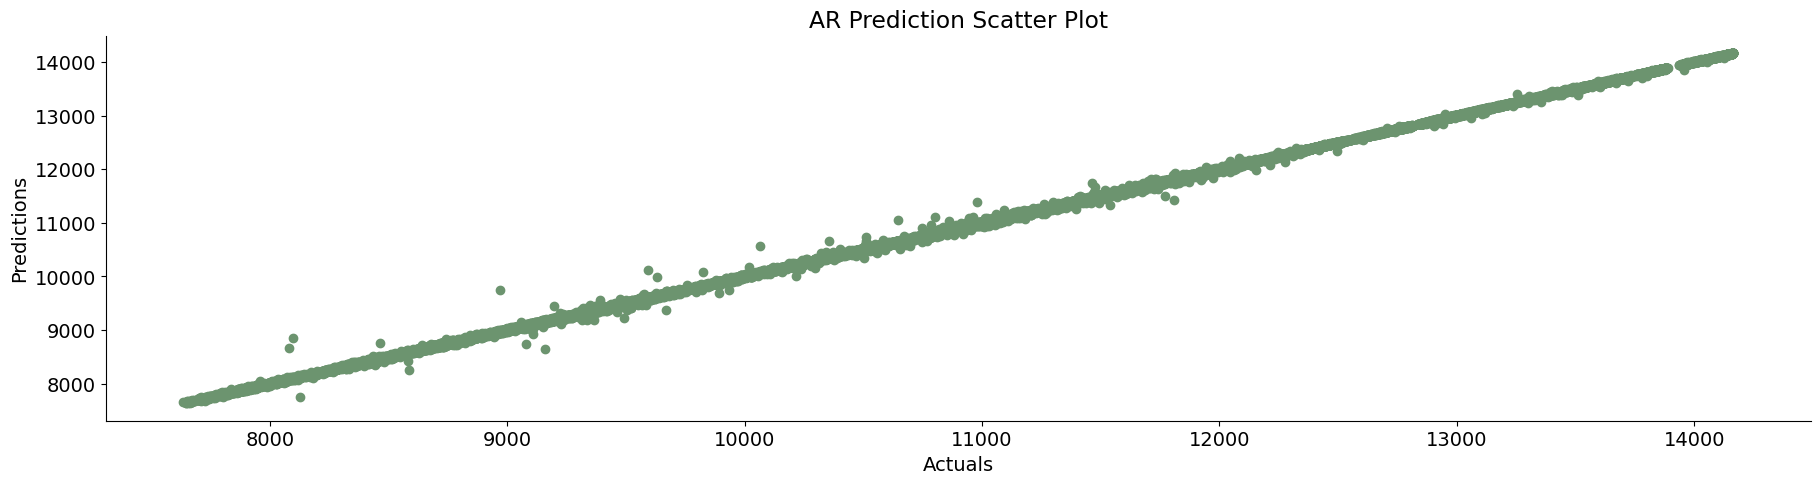

In [19]:
plt.scatter(df['close'], df['AR_Preds'], color='#6C946F')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Actuals')
plt.ylabel('Predictions')
plt.title('AR Prediction Scatter Plot')
plt.show()

In [20]:
MSE = float(round(mean_squared_error(df['close'], df['AR_Preds']),2))
print(f"The Mean Squared Error for the AR model here is {MSE}.")

The Mean Squared Error for the AR model here is 36.2.


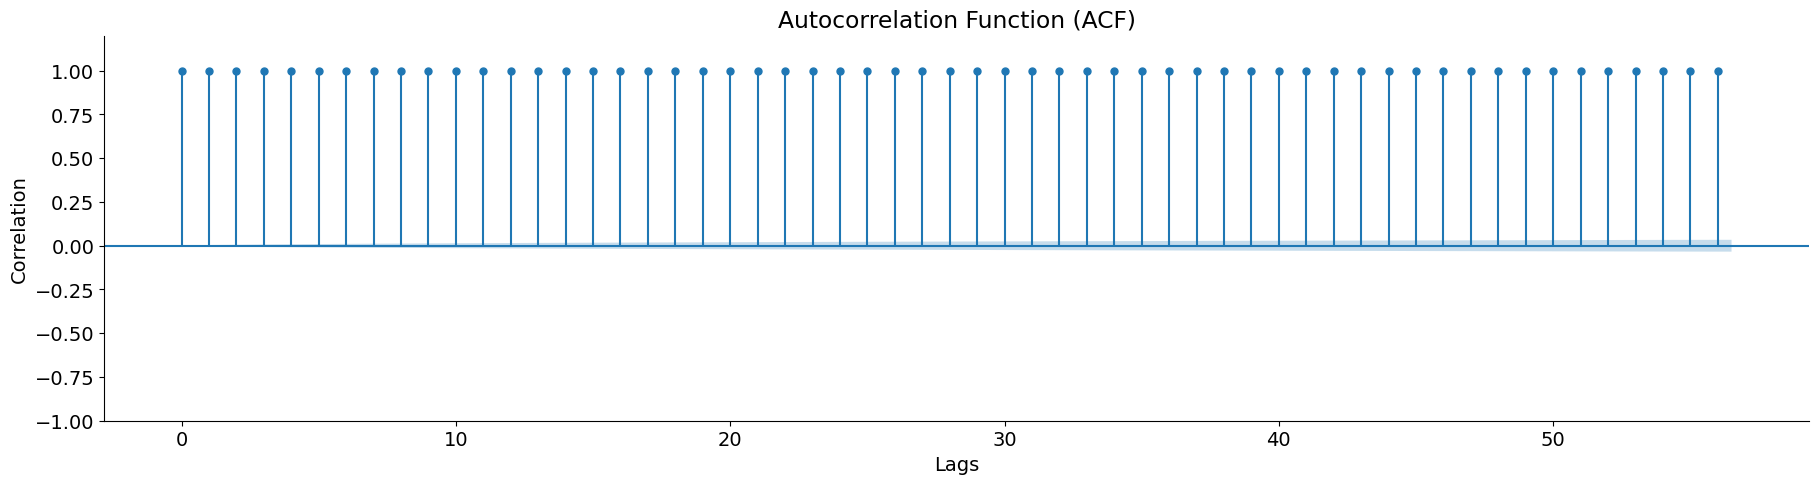

In [21]:
plot_acf(df['close']) #acf tells q (MA)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#Rotate the x-tick labels by 45 degrees
plt.xticks(rotation=0)
#Set the title, x-axis label, y-axis label, and legend
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title('Autocorrelation Function (ACF)')
plt.ylim(top=1.2)
plt.show()

In [22]:
acf_values = acf(df['close'], nlags=len(df['close'])-1)

# Print ACF values
print("ACF Values:", acf_values)

ACF Values: [ 1.00000000e+00  9.99962161e-01  9.99923974e-01 ... -6.17635516e-05
 -4.11543529e-05 -2.05895345e-05]


In [37]:
# If non-stationary, apply differencing
differenced_series = np.diff(df['close'], n=1)

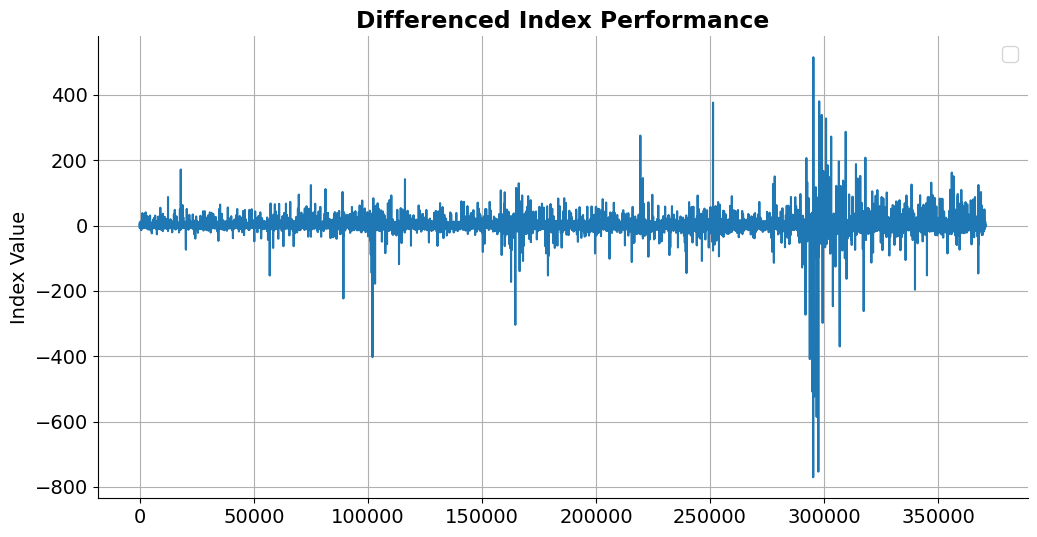

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(differenced_series)
plt.ylabel("Index Value")
plt.title("Differenced Index Performance", fontweight="bold")
plt.legend()
plt.grid()
plt.show()

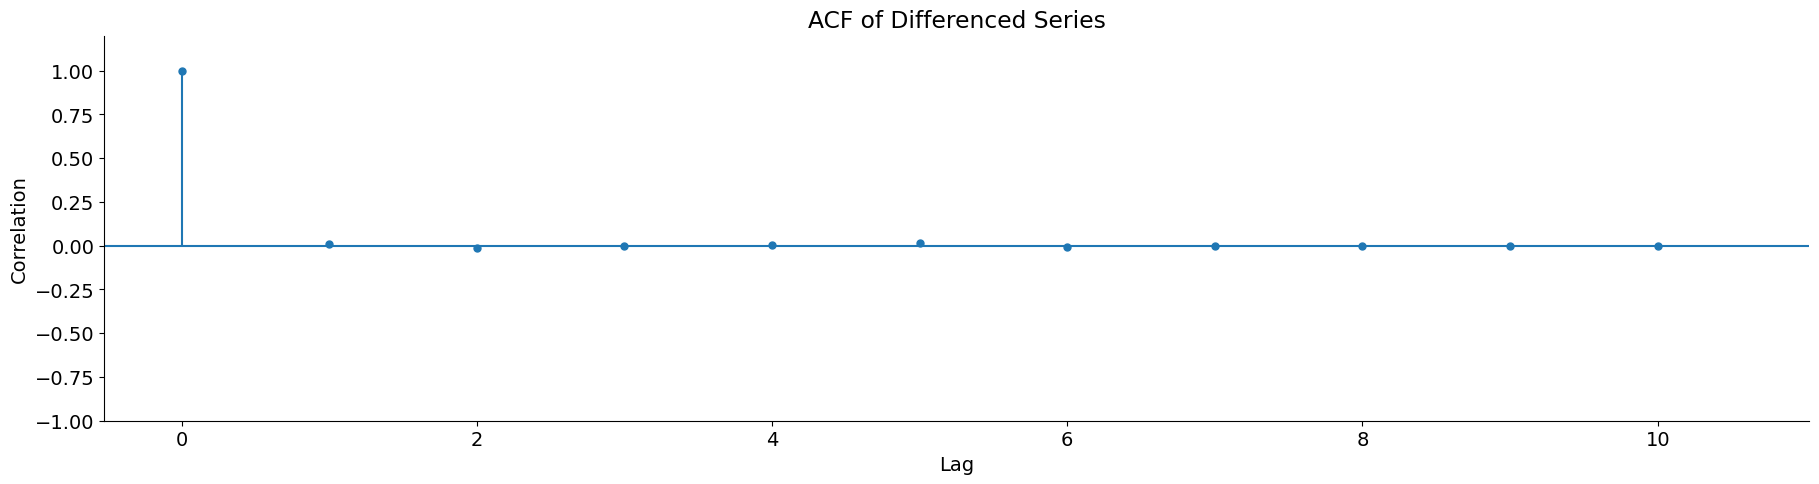

In [39]:
# Plot ACF of differenced series
plot_acf(differenced_series, lags=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.title('ACF of Differenced Series')
plt.ylim(top=1.2)
plt.show()

In [40]:
X.loc[:, 'Intercept'] = round(df['close'].mean(),2)
X.head()

,close_lag_1,close_lag_2,intercept,Intercept
2,8391.15,8391.10,1,10963.65
3,8373.60,8391.15,1,10963.65
4,8376.75,8373.60,1,10963.65
5,8373.70,8376.75,1,10963.65
6,8365.60,8373.70,1,10963.65


In [41]:
y.head()

,close
2,8373.60
3,8376.75
4,8373.70
5,8365.60
6,8371.20


In [46]:
from sklearn.linear_model import Ridge

# data: Time series of observed values
observed_values = np.array(df['close'].values)
observed_values = (observed_values - np.mean(observed_values)) / np.std(observed_values)

# Define parameters
q = 2  # Order of the MA model
errors = np.zeros_like(observed_values)  # Initial error terms

# Initialize lagged errors matrix and response vector
lagged_errors = []
responses = []

# Calculate initial errors (assuming mean is a simple baseline)
mu = np.mean(observed_values)
errors[:q] = observed_values[:q] - mu

# Prepare data for least squares estimation
for t in range(q, len(observed_values)):
    if np.any(np.isnan(errors[t-q:t])):
        continue  # skip if not enough valid errors

    # We reverse the error lags / Last Element in Error Lag Array = Most Recent Error Lag
    error = errors[t-q:t][::-1]
    lagged_errors.append(error)

    #Removing the median = Removing the baseline = Focus on Actual Fluctuation b/w prediction and actual value
    values =  observed_values[t] - mu
    responses.append(values)

# Convert to NumPy arrays
lagged_errors = np.array(lagged_errors)
responses = np.array(responses)

model = Ridge(alpha=10.0, fit_intercept=False)
model.fit(lagged_errors, responses)
theta = model.coef_

# Calculate theta using least squares
#theta, _, _, _ = np.linalg.lstsq(lagged_errors, responses, rcond=None)

print("Estimated MA coefficients (theta):", theta)

# Calculate errors and predicted values
predicted_values = np.zeros_like(observed_values)
for t in range(q, len(observed_values)):
    e_slice = errors[t-q:t][::-1]
    if np.any(np.isnan(e_slice)):
        print(f"NaN in error slice at t={t}: {e_slice}")
        continue

    predicted_values[t] = mu + np.dot(theta, e_slice)
    errors[t] = observed_values[t] - predicted_values[t]

Estimated MA coefficients (theta): [0.09067598 0.23666436 0.53062064]


In [47]:
print('lagged_errors: \n',lagged_errors,'\n')
print('responses: \n',responses,'\n')
print('observed_values: \n',observed_values,'\n')
print('predicted_values: \n',predicted_values,'\n')

lagged_errors: 
 [[-2.49704863 -2.49410803 -2.49714504]
 [ 0.         -2.49704863 -2.49410803]
 [ 0.          0.         -2.49704863]
 ...
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]] 

responses: 
 [-2.50485809 -2.49945896 -2.50244777 ...  3.05933754  3.05634873
  3.05630052] 

observed_values: 
 [-2.49714504 -2.49410803 -2.49704863 ...  3.05933754  3.05634873
  3.05630052] 

predicted_values: 
 [0.         0.         0.         ... 1.41656064 1.41059388 1.40985814] 



In [48]:
# probability or say confidence of the Prediction made by the AR model
probabilites = 1/(1 + np.exp(-predicted_values))
conf = round(np.mean(probabilites)*100,2)
mse = mean_squared_error(observed_values, predicted_values)
print(f"The model is {conf}% confident in the predictions made by the MA Model")
print(f'The Mean Squared Error between Observed And Predicted Value by MA Model is {round(MSE,4)}.')

The model is 50.03% confident in the predictions made by the MA Model
The Mean Squared Error between Observed And Predicted Value by MA Model is 36.2.


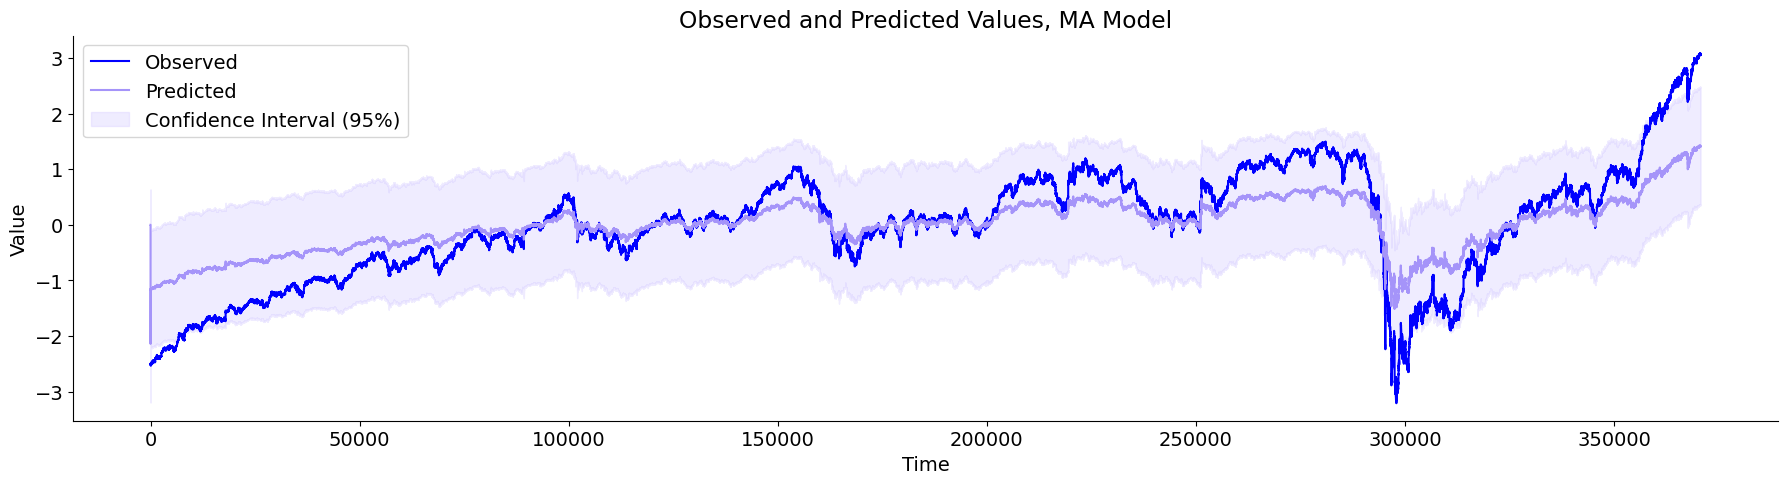

In [54]:
# Plot the results
plt.plot(observed_values, label='Observed', color='blue')
plt.plot(predicted_values, label='Predicted', color='#A594F9')

error_std = np.std(errors[q:])
lower_bound = predicted_values - 1.96 * error_std
upper_bound = predicted_values + 1.96 * error_std

plt.fill_between(
    np.arange(q, len(predicted_values)),
    lower_bound[q:], upper_bound[q:],
    color='#CDC1FF',
    alpha=0.3,
    label='Confidence Interval (95%)'
)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Observed and Predicted Values, MA Model')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [56]:
model = ARIMA(df['close'], order=(1,0,0))
fitted_model = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [57]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:               370675
Model:                 ARIMA(1, 0, 0)   Log Likelihood            -1191189.708
Date:                Mon, 07 Apr 2025   AIC                        2382385.417
Time:                        18:28:59   BIC                        2382417.886
Sample:                             0   HQIC                       2382394.724
                             - 370675                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.096e+04   5.69e-10   1.93e+13      0.000     1.1e+04     1.1e+04
ar.L1          1.0000   4.96e-06   2.02e+05      0.000       1.000       1.000
sigma2        36.2059      0.002   1.51e+04      0.000      36.201      36.211
===================================================================================
Ljung-Box (L1) (Q):                  44.32   Jarque-Bera (JB):      100525227595.04
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.99   Skew:                           -15.18
Prob(H) (two-sided):                  0.00   Kurtosis:                      2554.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.93e+22. Standard errors may be unstable.
"""

In [58]:
predictions = fitted_model.predict().to_frame()
predictions['actual'] = df['close']
predictions['timestamp'] = df['timestamp']
predictions = predictions[['timestamp', 'actual', 'predicted_mean']]
predictions.rename(columns={'predicted_mean': 'Predictions'}, inplace=True)
predictions

,timestamp,actual,Predictions
2,2017-01-02 09:17:00+05:30,8373.60,10963.646149
3,2017-01-02 09:18:00+05:30,8376.75,8373.632736
4,2017-01-02 09:19:00+05:30,8373.70,8376.782697
5,2017-01-02 09:20:00+05:30,8365.60,8373.732735
6,2017-01-02 09:21:00+05:30,8371.20,8365.632838
...,...,...,...
370672,2021-01-01 15:25:00+05:30,14137.70,14141.109839
370673,2021-01-01 15:26:00+05:30,14137.10,14137.659882
370674,2021-01-01 15:27:00+05:30,14136.80,14137.059890
370675,2021-01-01 15:28:00+05:30,14133.70,14136.759893


In [59]:
#Probability or say confidence of the Prediction made by the AR model
probabilites = 1/(1 + np.exp(-predictions['Predictions']))
conf = round(np.mean(probabilites)*100,2)
print(f"The model is {conf}% confident in the predictions made by the ARMA Model")

The model is 100.0% confident in the predictions made by the ARMA Model


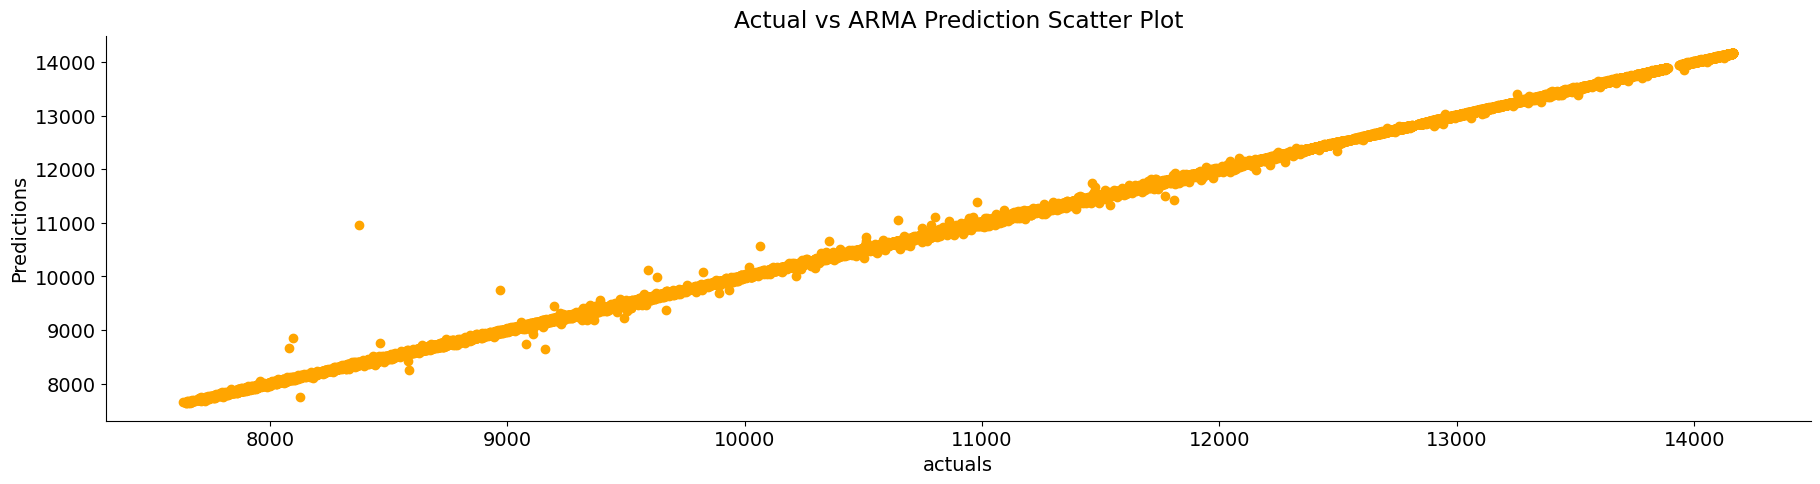

In [60]:
plt.scatter(predictions['actual'], predictions['Predictions'], color='orange')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#Set the title, x-axis label, y-axis label, and legend
plt.xlabel('actuals')
plt.ylabel('Predictions')
plt.title('Actual vs ARMA Prediction Scatter Plot')
plt.savefig('arima.jpg')
plt.show()

In [62]:
ARMA_mse = mean_squared_error(predictions['actual'], predictions['Predictions'])
print(f"The Mean Squared error of the ARMA model is {round(ARMA_mse,4)}.")

The Mean Squared error of the ARMA model is 54.3034.
